In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'..')


from food.paths import *
from food.search import *
from mytools.tools import *
import pandas as pd
from pathlib import Path
import numpy as np
from IPython.display import clear_output

photos_path = test_path/'test_photos'

dev


/home/dima/new/mytools/mytools/visual.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  series2tensor = lambda series:torch.tensor([np.array(c) for c in series.values])


In [2]:
from segmentor.segment import get_segment_model

In [1]:
df = pd.read_csv(test_path/'test_set.csv')
df.columns = ['name','fat','protein','carb','energy','','','','','','composition','url']
df = df[[c for c in df.columns if c!='']]

df['url'] = df['url'].apply(lambda n:f'{domain}/test_photos/{n}.jpeg')

for c in ['fat','protein','carb','energy']:
    df[c] = pd.to_numeric(df[c].str.replace(',','.'))

NameError: name 'pd' is not defined

In [4]:
corrupted_items = [4]
df = df[~df.index.isin(corrupted_items)]

In [5]:
model_path = checkpoints_path.ls()[0]
segment_model = get_segment_model(model_path,device = 'cuda:1')

/home/dima/new/segmentator/mmseg/models/builder.py:59: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(


load pre-trained weight from imagenet21k


In [27]:
preds_ = []

In [ ]:
for i in df.index[:10]:
    clear_output()
    print(i)
    try:
        s = df.loc[i]
        img,clip_df,masks,urls,stats = search(s['url'],segment_model=segment_model,prompt_factor=0.5,exand_times =0,stego = False)
        pred = stats.T[['energy','protein','carb','fat']]
        pred.index = [i]
        preds_.append(pred)
    except:
        pass

preds = pd.concat(preds_)
preds.columns = [c+'_pred' for c in preds.columns]
preds = df.join(preds).dropna()
(preds['energy']/preds['energy_pred']-1).abs().mean()
preds['error'] = (preds['energy']/preds['energy_pred']-1)
# preds = preds.set_index('name')
preds['error_abs'] = preds['error'].abs()


In [ ]:
preds['error_abs'].mean()

In [25]:
preds = preds.sort_values("error_abs")

In [26]:
preds.tail()

,name,fat,protein,carb,energy,composition,url,energy_pred,protein_pred,carb_pred,fat_pred,error,error_abs
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,169.478958,5.797573,24.453396,5.364585,0.467793,0.467793
9,Поке с лососем,3.27,1.82,7.42,66.41,"Основа на выбор: рис, киноа или салат. \nСоста...",https://dima.skynet.center/test_photos/f1b31a2...,136.924286,9.781154,17.116989,5.646695,-0.514987,0.514987
6,Мусс из свежего манго с сырно-кокосовым кремом,10.20,1.95,14.03,155.72,"Состав: пюре манго, сырно-кокосовый крем (коко...",https://dima.skynet.center/test_photos/0de6a52...,340.421204,3.955222,18.995230,30.752089,-0.542567,0.542567
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,134.583450,7.521719,22.593149,2.518137,0.848370,0.848370
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,134.583450,7.521719,22.593149,2.518137,0.848370,0.848370


In [19]:
img,clip_df,masks,urls,stats = search(preds.iloc[-1]['url'],segment_model=segment_model,prompt_factor=0.1,exand_times =0,stego = False)

/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/home/dima/new/food_dev/00_nbs/../food/search.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clip_df = clip_df.append(df)
/home/dima/new/food_dev/00_nbs/../food/search.py:

In [13]:
clip_df

,id,clip,text,version,description,category,energy,protein,carb,fat,score,classes,area
3,1098758,"[-0.0046953545, -0.001627595, -0.017129695, -0...","""Fish, NS as to type, steamed"" made of Fish, s...",2,"Fish, NS as to type, steamed",Fish,160.0,25.78,0.00,5.53,0.298407,45,130803
2,1102594,"[0.012904165, 0.050844237, 0.020554325, 0.0204...","the photo of ""Lemon, raw"" dish, which is made...",1,"Lemon, raw",Citrus fruits,29.0,1.10,9.32,0.30,0.283892,38,45110
1,1098965,"[-0.009137235, 0.023885716, -0.01256289, -0.01...","""Salmon, baked or broiled, no added fat"" made ...",2,"Salmon, baked or broiled, no added fat",Fish,160.0,25.82,0.10,5.54,0.293465,28,35362
0,1103935,"[0.008892021, 0.045032684, 0.014019952, 0.0420...","the photo of ""Sugar, brown"" dish, which is ma...",1,"Sugar, brown",Sugars and honey,380.0,0.12,98.09,0.00,0.267024,14,21719
4,1103952,"[-0.0063954075, 0.018880386, -0.00012752852, 0...","the photo of ""Chocolate syrup, light"" dish, w...",1,"Chocolate syrup, light","Jams, syrups, toppings",153.0,1.40,34.56,0.97,0.248959,53,20362


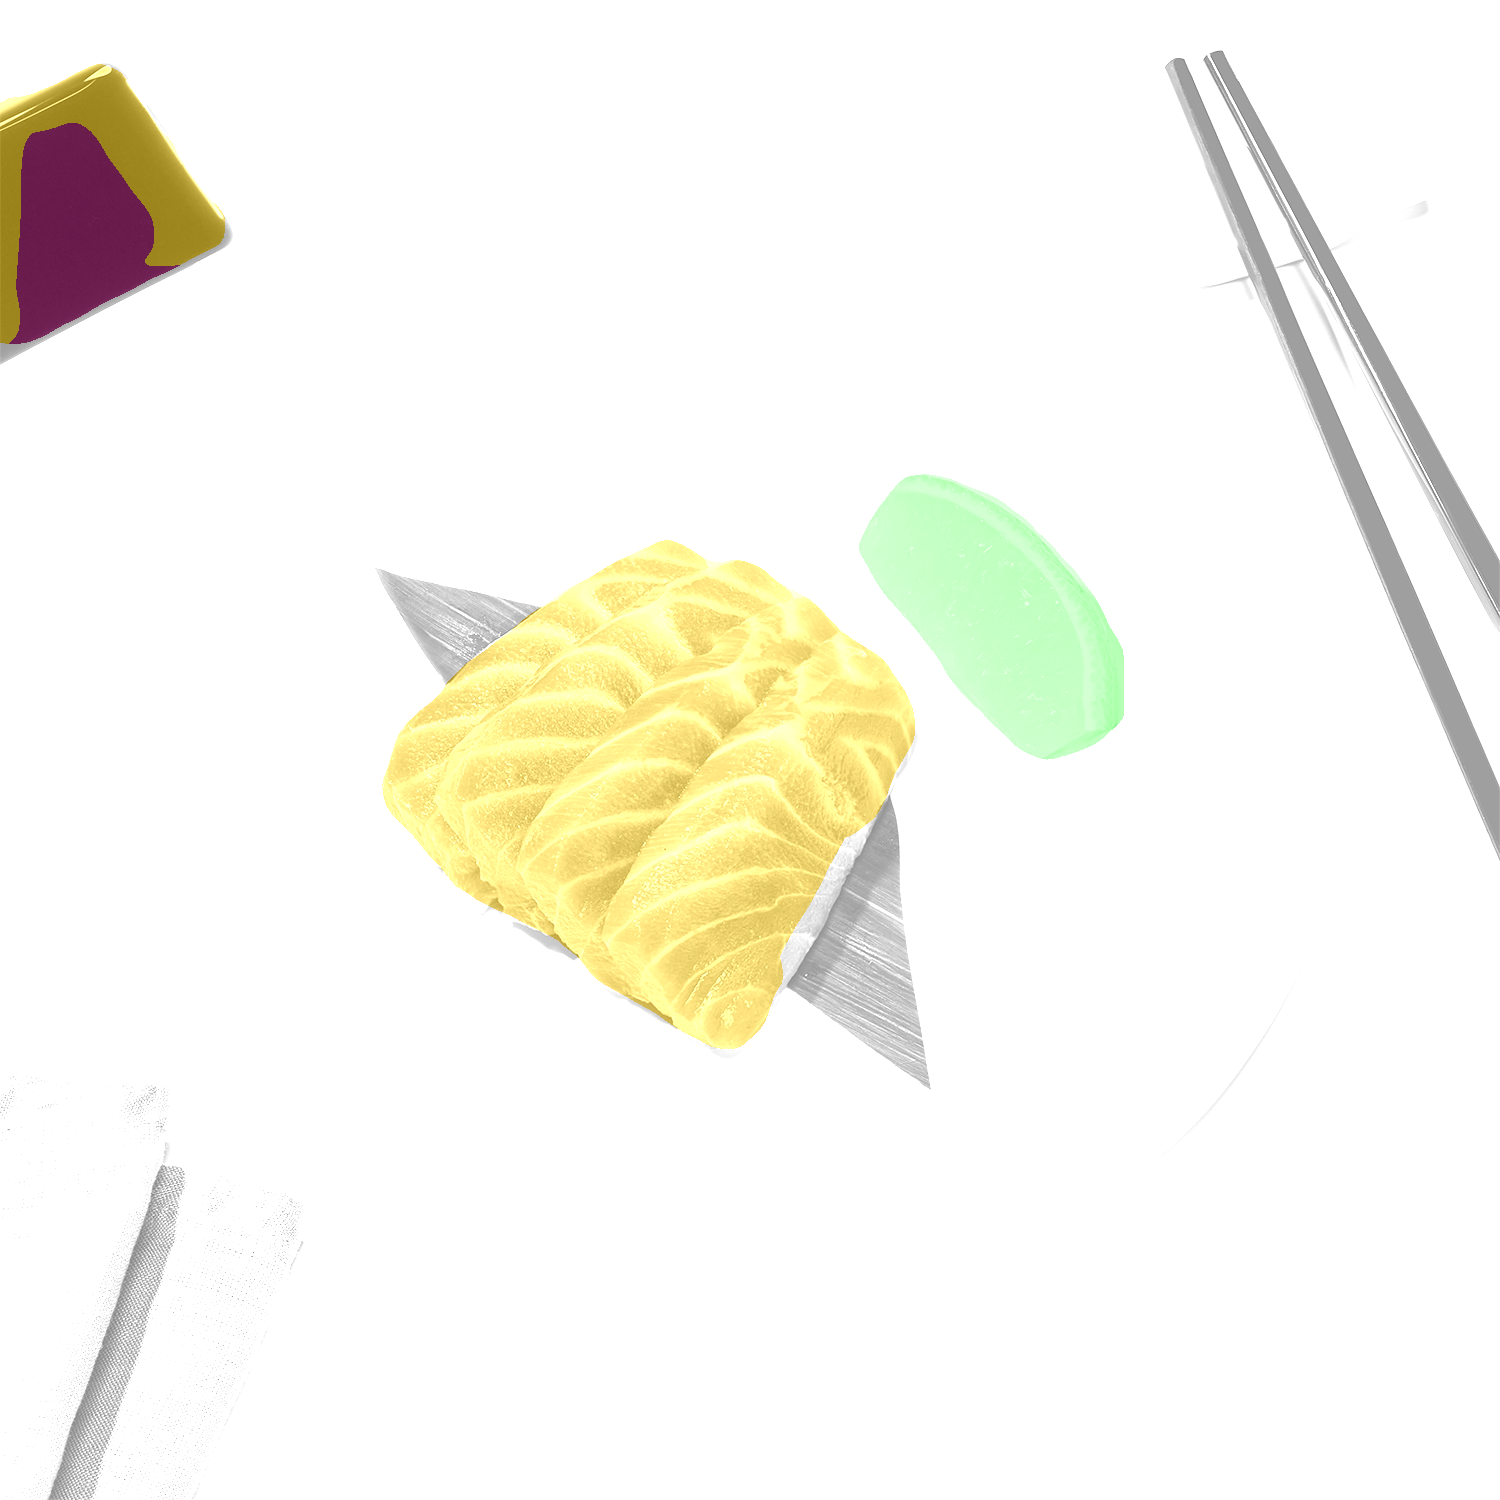

In [14]:
img

'https://dima.skynet.center/test_photos/b0319d42-2191-4b00-b1c8-feb09c82dc48.jpeg'